<a href="https://colab.research.google.com/github/eildes06/Machine-Learning/blob/main/RNN_project_Mutivariate_Time_Series_with_RNN_(Bike_Sharing_Demand_Prediction)_emine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="text-align: center;">Deep Learning<br><br>Multivariate Time Series Forecasting with RNN<br><br>Demand Prediction Project (Bike Sharing)<br><h1>

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

## Improt Libraries and Indest Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

- Generally time series need to be change index columns by timestamp.
- Parse dates: If a column or index cannot be represented as an array of datetimes, say because of an unparsable value or a mixture of timezones, the column or index will be returned unaltered as an object data type. 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/store_sharing.csv',index_col='timestamp', parse_dates = True)

In [4]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


---
---

- As seen index columns is timestamp now.

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [5]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


- There is no missing value in this data
- Data is enough big for analysing
- There are 9 columns
- 17414 rows

In [7]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


- When we check our data we saw that  cnt is our target feature.
- Our numeric features are t1,t2, hum, wind_speed. 
- Other features are need to convert numeric by get dumies or one hot encoding

In [9]:
df.shape

(17414, 9)

In [10]:
df.weather_code.value_counts()

1.000     6150
2.000     4034
3.000     3551
7.000     2141
4.000     1464
26.000      60
10.000      14
Name: weather_code, dtype: int64

In [11]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

cnt has 3781 unique value
t1 has 73 unique value
t2 has 82 unique value
hum has 143 unique value
wind_speed has 103 unique value
weather_code has 7 unique value
is_holiday has 2 unique value
is_weekend has 2 unique value
season has 4 unique value


- You can see general information of data.

In [12]:
df.duplicated().sum()

2

- There is only 2 rows have duplicated values that is not important in such a big data.

In [13]:
numeric= df[["cnt","t1","t2","wind_speed","hum"]]
numeric.head()

,cnt,t1,t2,wind_speed,hum
timestamp,,,,,
2015-01-04 00:00:00,182,3.000,2.000,6.000,93.000
2015-01-04 01:00:00,138,3.000,2.500,5.000,93.000
2015-01-04 02:00:00,134,2.500,2.500,0.000,96.500
2015-01-04 03:00:00,72,2.000,2.000,0.000,100.000
2015-01-04 04:00:00,47,2.000,0.000,6.500,93.000


- Data have categoric features , for statical analysis we need numeric features
- We creeated new dataframe which name is numeric.

### Plot Breakdowns of Data

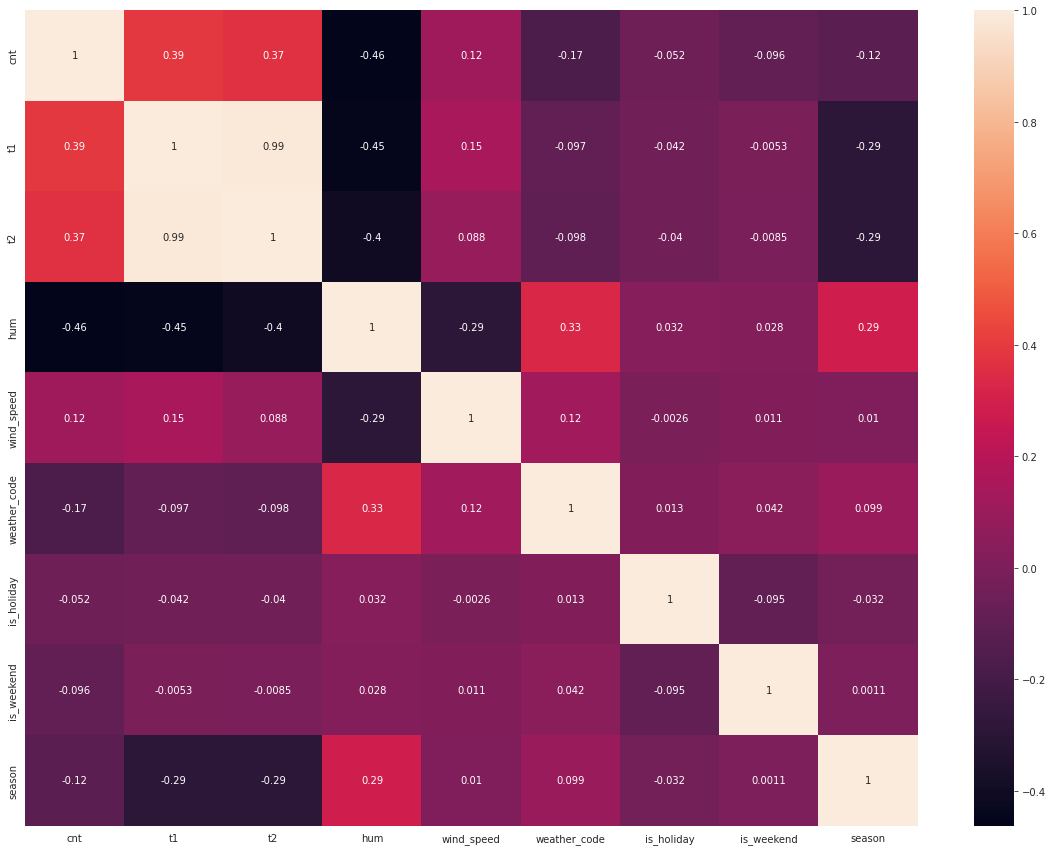

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

- Temperature_real(t1) and Temperature Feel(t2) have multicorenality 
- We can decide what will we do to them on process.

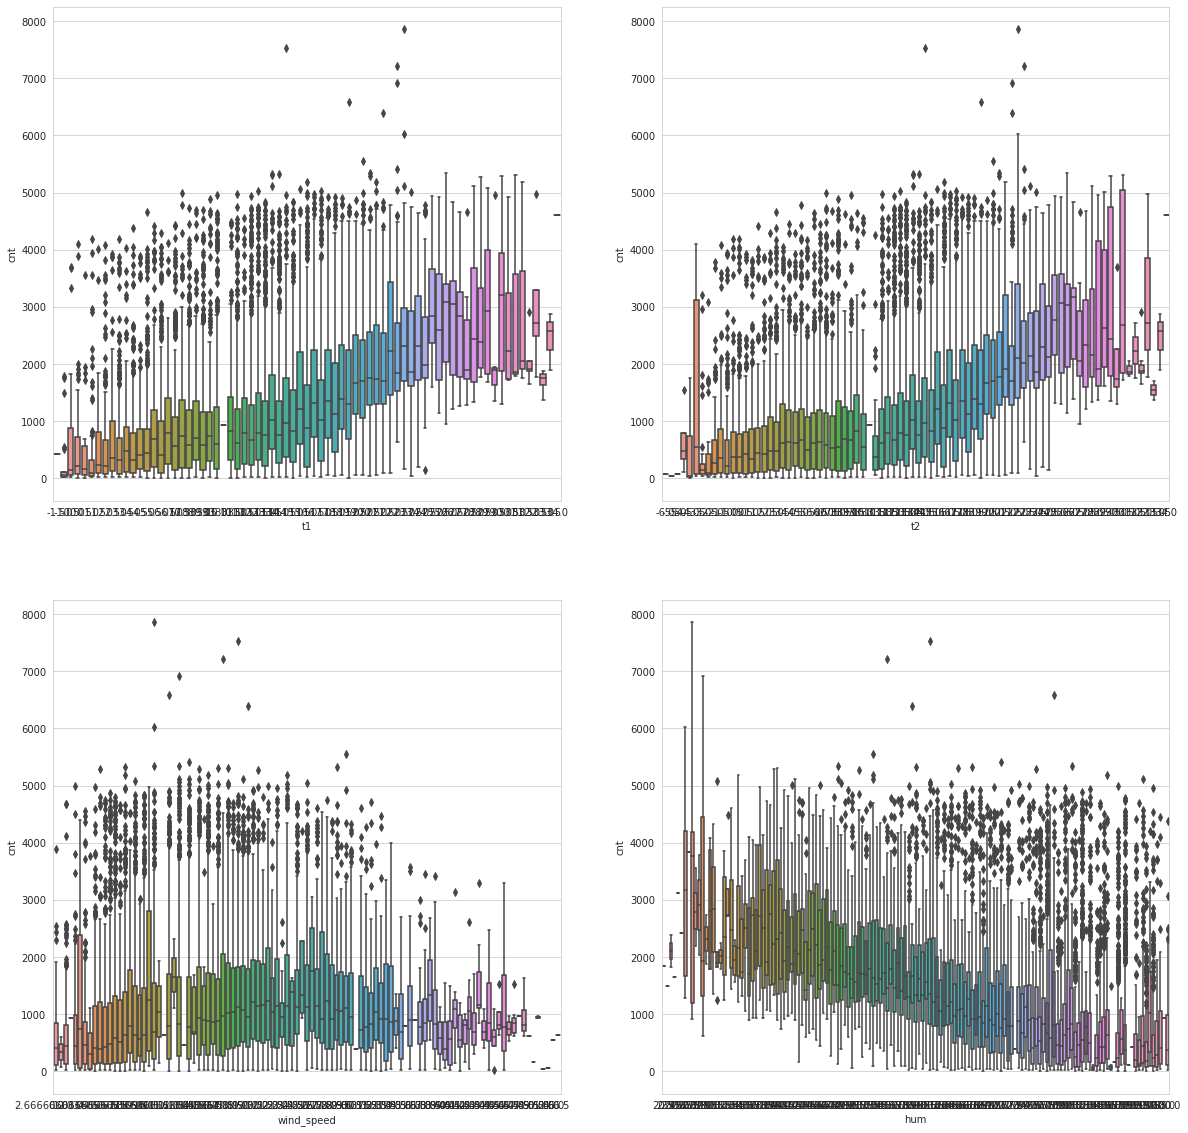

In [15]:
index = 0
plt.figure(figsize=(20,20))
for feature in numeric:
    if feature != "cnt":
        index += 1
        plt.subplot(2, 2, index)
        sns.boxplot(x=feature, y="cnt", data=df)

- This box plot shows to cnt and numeric feature connection.
- Although it is so complex you could see the outliers.

In [16]:
df=df.rename(columns = {'t1':'T_real', 't2':'t_feel'})

- For more understantable code we changed the names of t1 and t2.

In [17]:
df.head()

,cnt,T_real,t_feel,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


In [18]:
def boxplotit(data,x=3,y=3,drops=[]):
    index = 0
    plt.figure(figsize=(x*6, y*4))
    for feature in numeric.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x,y,index)
        sns.boxplot(x=feature, data=numeric, whis=2.5)

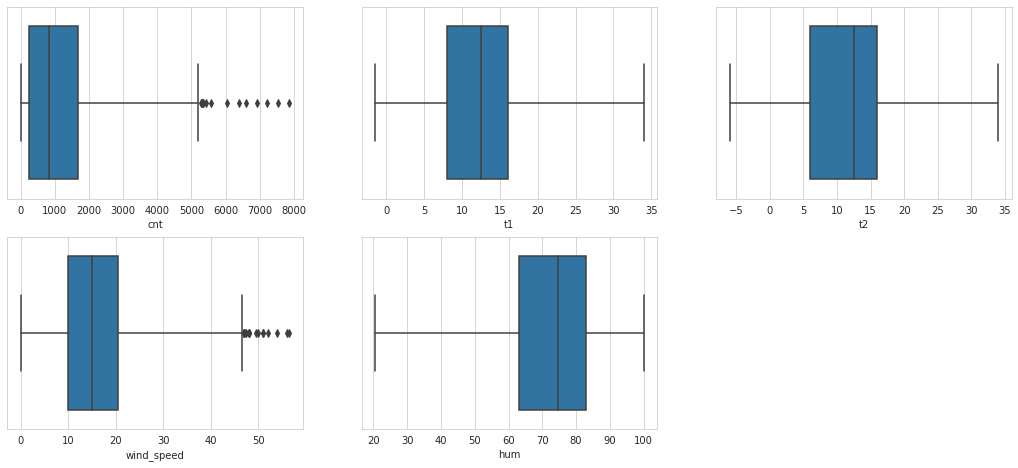

In [19]:
boxplotit(numeric)

- In here you can see aoutliers openly.
- But we need domain information if they are real outlier or not.
- We will discuss in further research.

In [20]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

- On process we will need to analysis of our timeseries data according to day , hour, week....
- So for this reason we seperated our data according to our wishes.

In [21]:
df.sample(5)

,cnt,T_real,t_feel,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date
timestamp,,,,,,,,,,,,,,,
2015-04-18 01:00:00,267,7.000,3.500,73.500,22.000,4.000,0.000,1.000,0.000,2015,4,18,5,1,2015-04-18
2015-04-26 06:00:00,71,9.000,7.000,94.000,13.000,7.000,0.000,1.000,0.000,2015,4,26,6,6,2015-04-26
2015-09-29 19:00:00,1979,15.000,15.000,68.000,18.000,1.000,0.000,0.000,2.000,2015,9,29,1,19,2015-09-29
2016-10-25 22:00:00,704,12.000,12.000,88.000,2.000,3.000,0.000,0.000,2.000,2016,10,25,1,22,2016-10-25
2016-06-06 19:00:00,2820,19.500,19.500,47.500,17.000,1.000,0.000,0.000,1.000,2016,6,6,0,19,2016-06-06


***i. Plot bike shares over time***

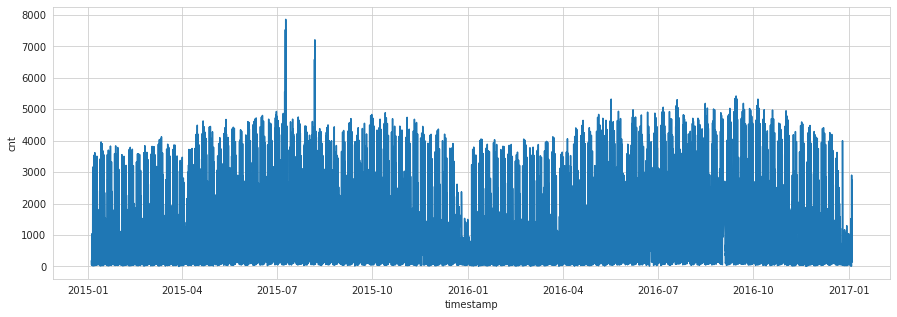

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index, "cnt", data=df);

- Month of January decreasing of cnt can be seen for each year.
- Is it pattern now it could be but we will see on process.
- 2015-07 there are some pig points that need to get more info.
- It could be extra comunity entartainment.

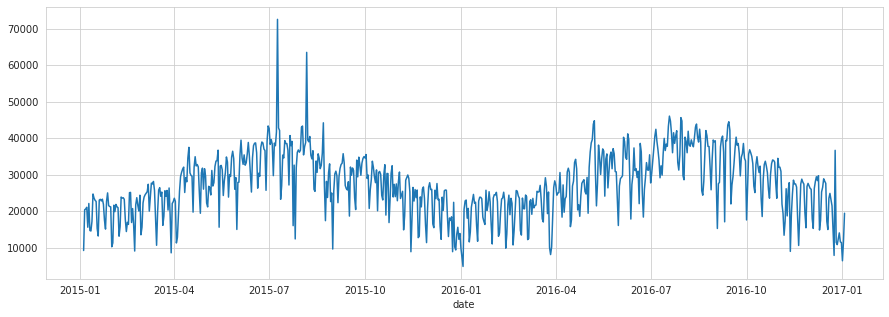

In [23]:
date_cnt = df.groupby("date")["cnt"].sum()
plt.figure(figsize=(15,5))
sns.lineplot(date_cnt.index, date_cnt.values);

***ii. Plot bike shares by months***

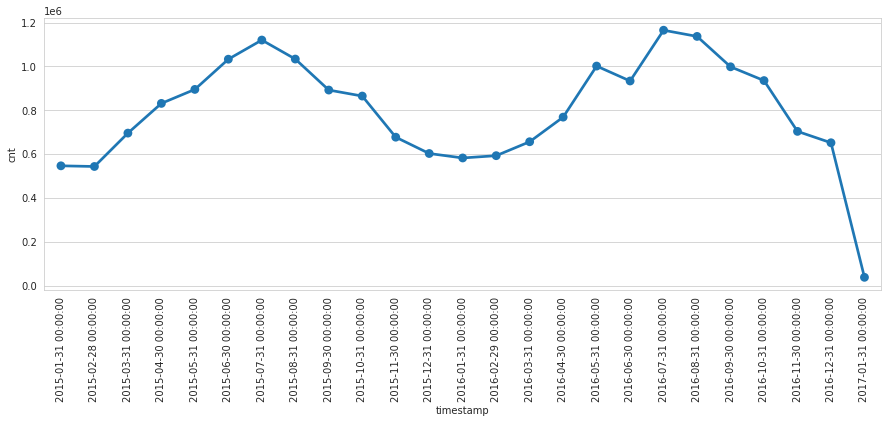

In [24]:
data_by_month = df.resample('M').sum()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x=data_by_month.index, y=data_by_month.cnt);

- When we checked to data month to month we  get similar information like years analysis.
- only extra we could see 2017-01 cnt decreasing deeply.

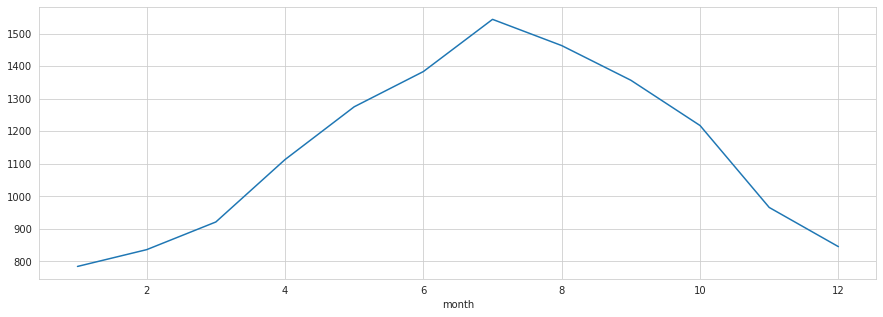

In [25]:
month_cnt = df.groupby("month")["cnt"].mean()
plt.figure(figsize=(15,5))
sns.lineplot(month_cnt.index, month_cnt.values);

- Which months is worse ,which is best you can see above graph
- It can give information to you when is the best time to make investment. 

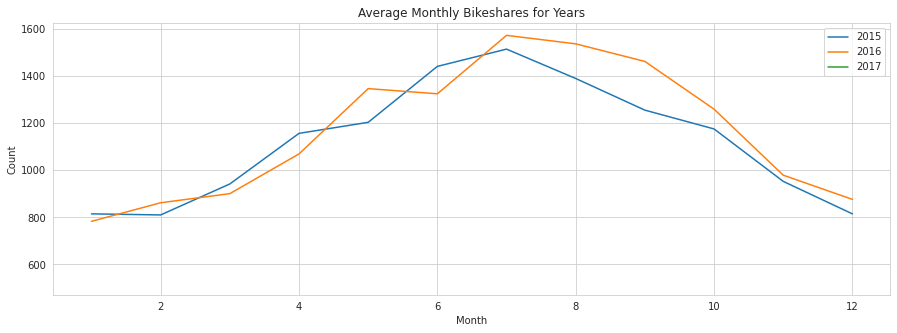

In [26]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

- You can see 2 years graphs together.
- They are not so different. 

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

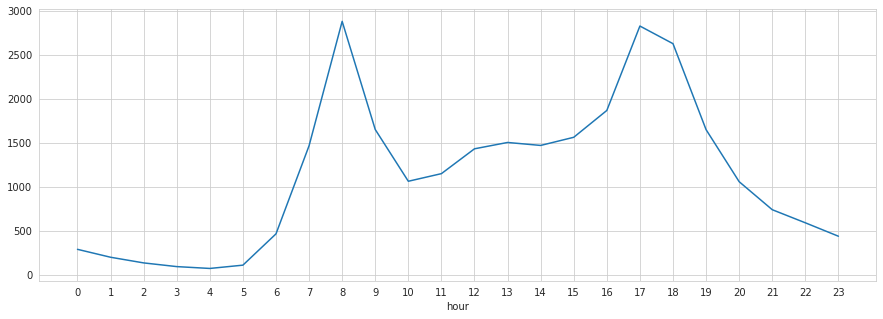

In [27]:
hour_cnt = df.groupby("hour")["cnt"].mean()
plt.figure(figsize=(15,5))
plt.xticks(np.arange(24))
sns.lineplot(hour_cnt.index, hour_cnt.values);

- In this graph morning 8 .00 and afternoon 17.00 have pig values (it looks like going and returning to job time).

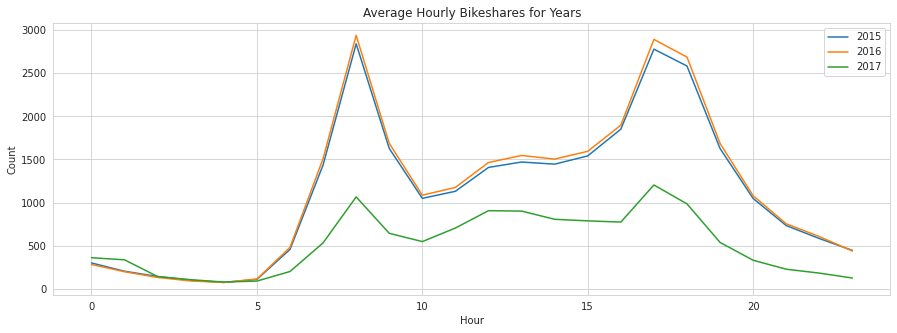

In [28]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

- 2015 and 2016 lines fit to each others
- 2017 could be fit but we do not have enough data for it.
- People behavoirs don`t change so much.

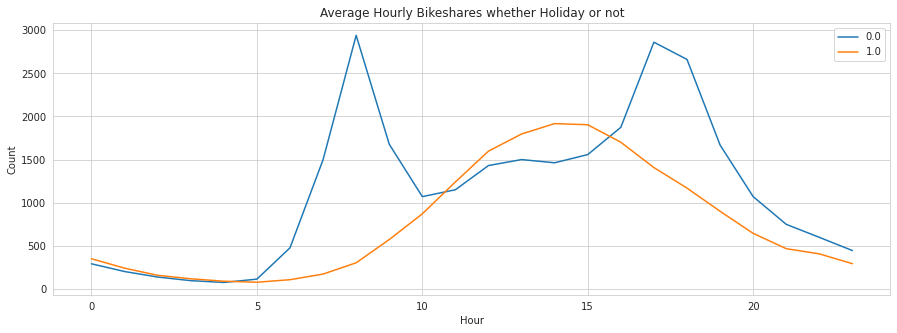

In [29]:
#df.groupby(["hour","is_holiday"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label=is_holiday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

- In this graph usage of bike is changing if there is holiday or not.


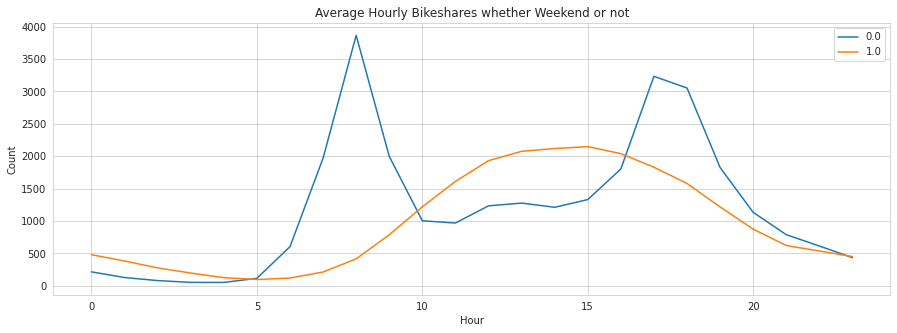

In [30]:
#df.groupby(["hour","is_weekend"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label=is_weekend)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

In [31]:
df.groupby(["is_holiday","is_weekend"])["cnt"].count()

is_holiday  is_weekend
0.000       0.000         12060
            1.000          4970
1.000       0.000           384
Name: cnt, dtype: int64

- Number of cnt according to holiday or weekend values are above.

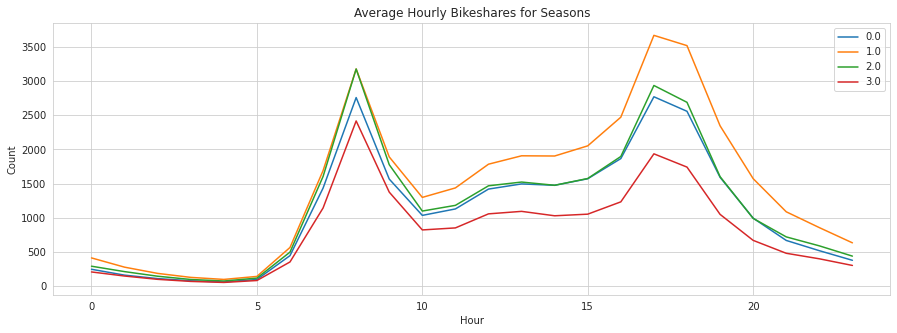

In [32]:
season_hour_cnt = df.groupby(["season", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

- Above you can see season graphs of data.
- There ara lost of similary for each season.

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

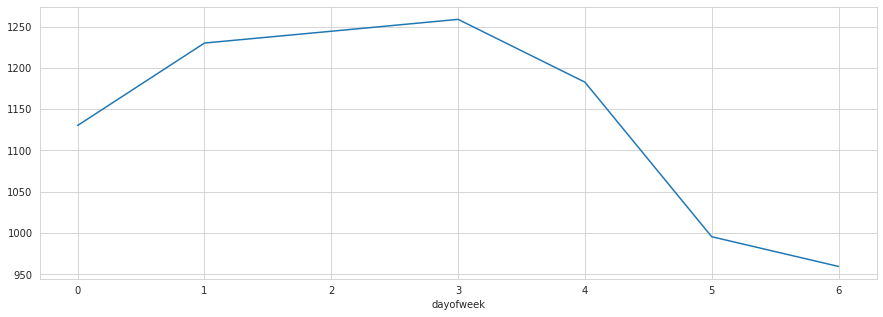

In [33]:
weekday_cnt = df.groupby("dayofweek")["cnt"].mean()
plt.figure(figsize=(15,5))
sns.lineplot(weekday_cnt.index, weekday_cnt.values);

- Graphs of week days.

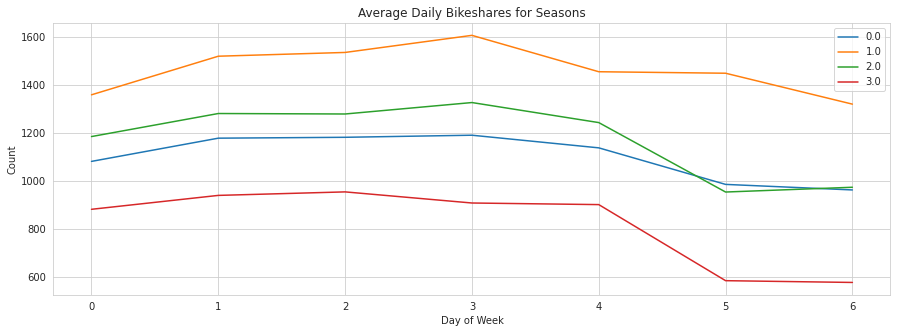

In [34]:
season_dayofweek_cnt = df.groupby(["season", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

- Connection of season and dy of week 
- You can see usage of bike is decreasing weekends.

***v. Plot the distribution of bike shares on holidays by seasons***

In [35]:
df_holiday=df[df['is_holiday']==1]

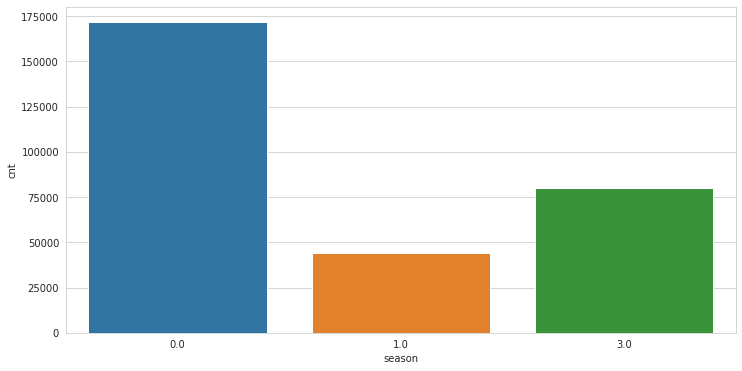

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='season', y='cnt', data=df_holiday, ci=None, estimator=sum);

- The bar chart is about season and cnt according to having holiday or not.
- There is no holiday season 2.0.

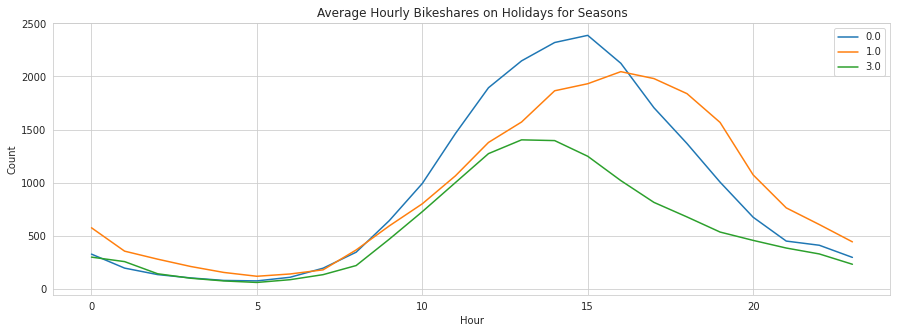

In [37]:
season_holiday_cnt = df_holiday.groupby(["season", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_holiday_cnt.index.levels[0]:
    plt.plot(season_holiday_cnt[season].index, season_holiday_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Holidays for Seasons')
plt.show()

- On holidays usage of bike is increasing day times.

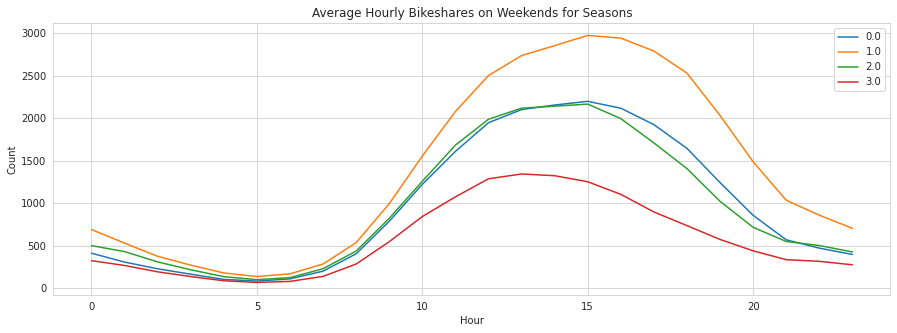

In [38]:
season_weekend_cnt = df[df["is_weekend"]==1].groupby(["season", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

- Average usage of bike according to weekends , 10 to 20 hours are increasing.

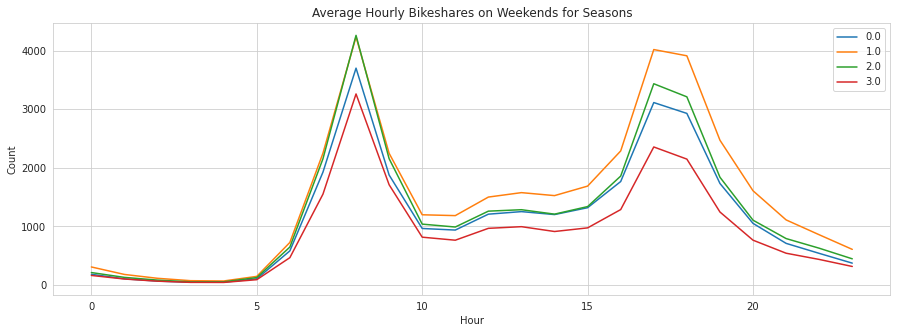

In [39]:
season_weekend_cnt = df[df["is_weekend"]==0].groupby(["season", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

- 

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

In [40]:
df.head()

,cnt,T_real,t_feel,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,6,0,2015-01-04
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,6,1,2015-01-04
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,2,2015-01-04
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,3,2015-01-04
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,6,4,2015-01-04


weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


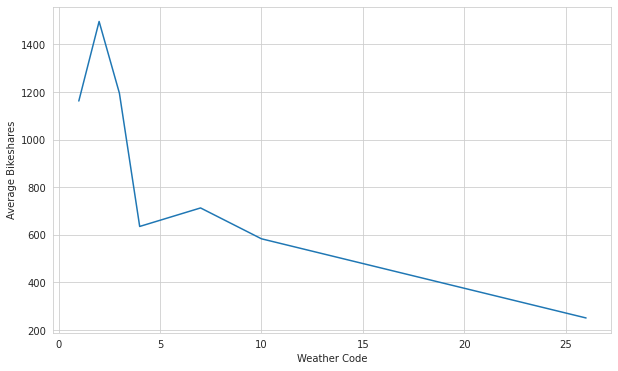

In [41]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

- There are numbers accoording to wearther codes
- The graph shows connection of weather code and cnt.
- In code 2 bikeshare have highest value.
- In code 26 bikeshare have lowest value.

- We had created some time values for our analysis. After this analysing we droped them.

In [42]:
df_new = df.drop(["t_feel", "date", "year", "season", "month", "dayofweek", "day", "hour"], axis=1)

In [43]:
df.columns

Index(['cnt', 'T_real', 't_feel', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'year', 'month', 'day',
       'dayofweek', 'hour', 'date'],
      dtype='object')

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   T_real        17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [45]:
weather_dummy = pd.get_dummies(df_new['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dum = pd.concat([df_new, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

,cnt,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,0,0,0,0,0,0


- Our categorical fefatures are nominal. Machine can think them like ordinal values.
- So they need to be converted binary values which machine can understand. 
- For dummy operation we used get dumies.

In [46]:
df_dum.shape

(17414, 12)

In [47]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[0:train_size], df_dum.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


- We shared train %90 and test % 10.

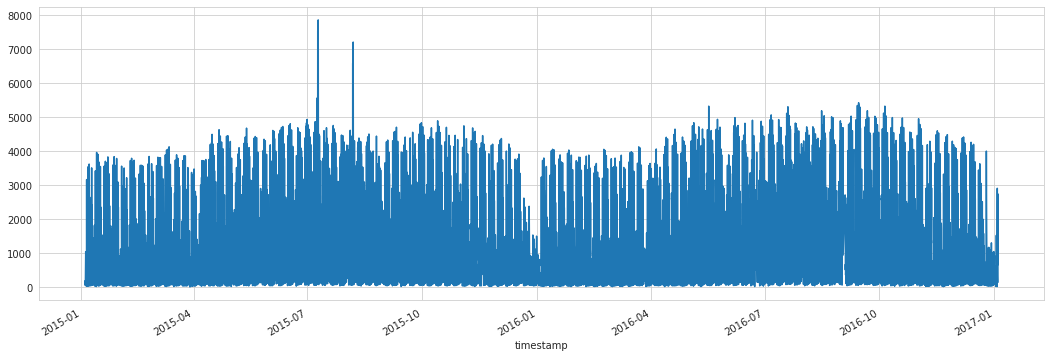

In [48]:
df_dum['cnt'].plot(figsize=(18,6))

- This is graph of all data.

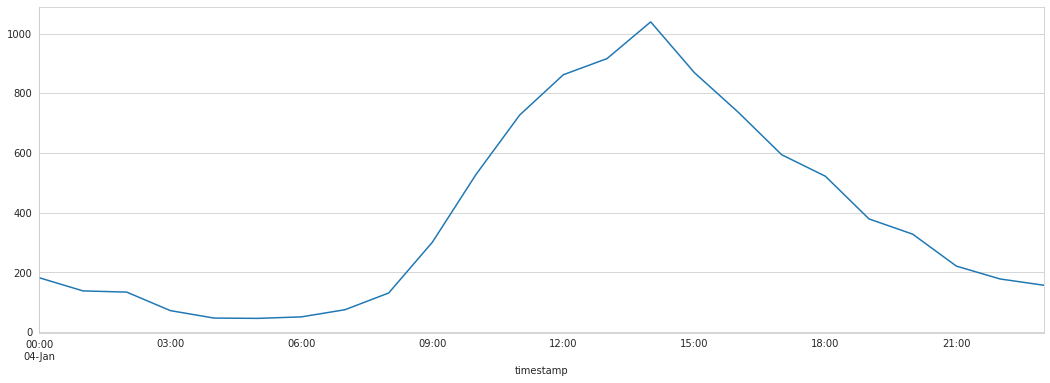

In [49]:
df_dum['cnt'].loc["2015-01-04 00:00:00" : "2015-01-04 23:00:00"].plot(figsize=(18,6))


- This is graph of 24 hours.

In [50]:
len(df_dum)

17414

In [51]:
test_days = 7

In [52]:
test_ind = test_days*24

In [53]:
test_ind

168

In [54]:
train = df_dum.iloc[:-test_ind]
test = df_dum.iloc[-test_ind:]

In [55]:
train.shape, test.shape

((17246, 12), (168, 12))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [56]:
from sklearn.preprocessing import RobustScaler

In [57]:
f_columns = ['T_real', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [58]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [59]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(17222, 24, 12) (17222,)


---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






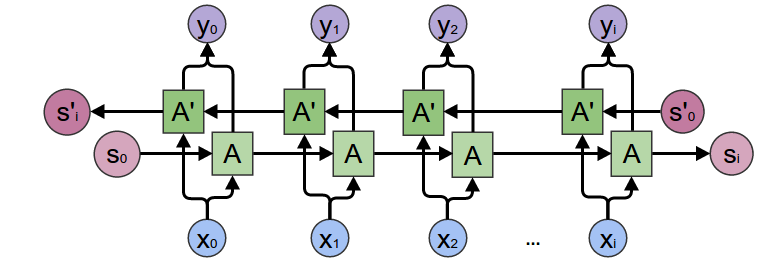

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
X_train.shape

(17222, 24, 12)

In [62]:
n_features =  X_train.shape[2]

In [63]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(X_train.shape[1],n_features))))

model.add(Dropout(rate=0.2)) 

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

- Early stop is a hyperparametre of DL.
- If there is not a differrence on 5 steps(Patience) according to monitor stop fitting.
- Give best values of fit (Restore best weights)
- Dropout blocks some norons to fight overfitting.

In [65]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
503/503 [==============================] - 12s 8ms/step - loss: 0.1271 - val_loss: 0.0606
Epoch 2/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0518 - val_loss: 0.0413
Epoch 3/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0374 - val_loss: 0.0361
Epoch 4/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0313 - val_loss: 0.0262
Epoch 5/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0259 - val_loss: 0.0239
Epoch 6/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0232 - val_loss: 0.0229
Epoch 7/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0214 - val_loss: 0.0214
Epoch 8/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0212 - val_loss: 0.0212
Epoch 9/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0207 - val_loss: 0.0252
Epoch 10/30
503/503 [==============================] - 3s 6ms/step - loss: 0.0194 - val_loss: 0.028

- We have 30 epochs but it worked 13 epochs.
- Because there is earlystop to finish fitting.
- Whenever decrase is small for val_loss on 5 steps it stopped fitting.

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              144384    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________


---
---

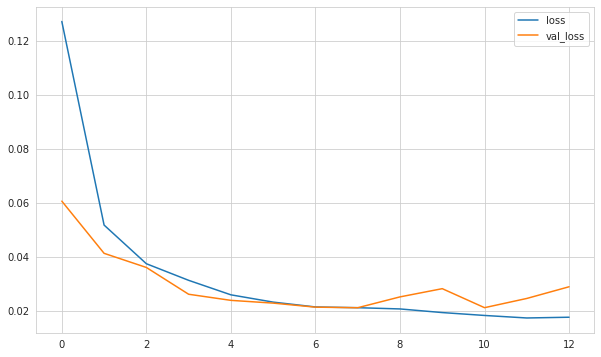

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

- Loss and val-loss both dercreasing.
- There is no overfit can be seen here.

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [68]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

### First way : after each prediction, reel value will be use for next prediction¶

In [71]:
eval_metrics(y_test, y_pred)

r2_score: 0.782940847340851 
 mae: 0.10839802176688722 
 mse: 0.027352050341277807 
 rmse: 0.16538455291011253


- R value is 0.78 that means our model can explain my data 70 percentage.

### Inverse Transformation and Compare

- inverse_transform(X[, copy]) : Scale back the data to the original representation.

In [72]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [73]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index

In [74]:
pred_test

,test,prediction
timestamp,,
2016-12-29 00:00:00,131.000,14.647
2016-12-29 01:00:00,79.000,-45.513
2016-12-29 02:00:00,52.000,-63.932
2016-12-29 03:00:00,61.000,9.437
2016-12-29 04:00:00,25.000,266.725
...,...,...
2017-01-03 19:00:00,1042.000,1170.296
2017-01-03 20:00:00,541.000,560.527
2017-01-03 21:00:00,337.000,306.345


In [75]:
eval_metrics(y_test_inv.flatten(), y_pred_inv.flatten())

r2_score: 0.7829408409842903 
 mae: 154.25038634406195 
 mse: 55385.96156748694 
 rmse: 235.34222223707954


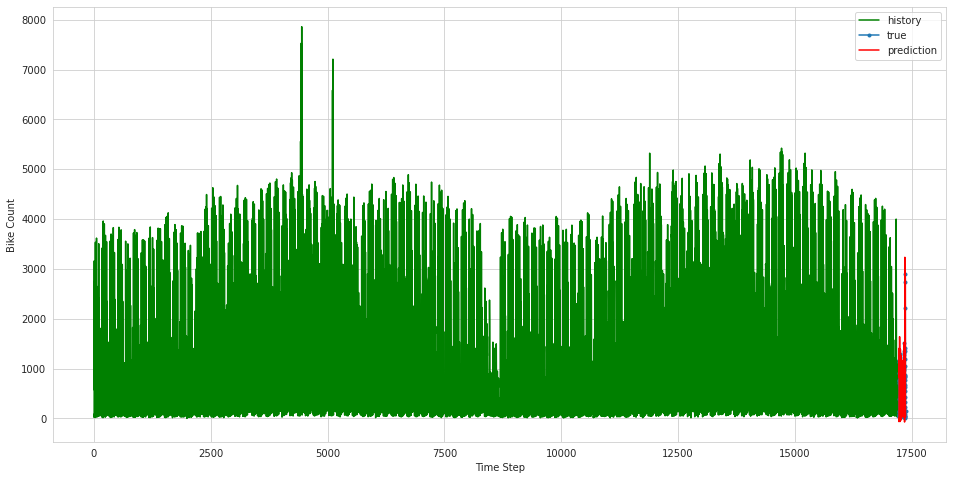

In [76]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

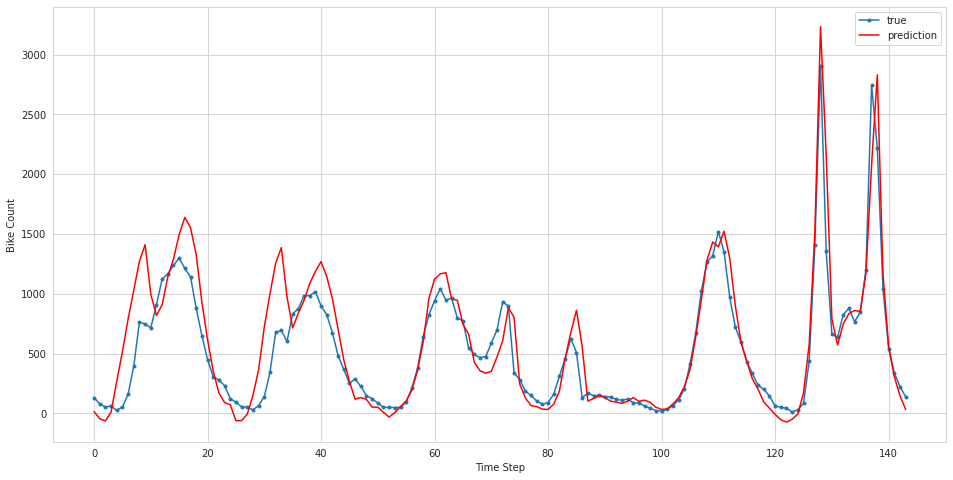

In [77]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

- Prediction and real values of data smilar to each others.


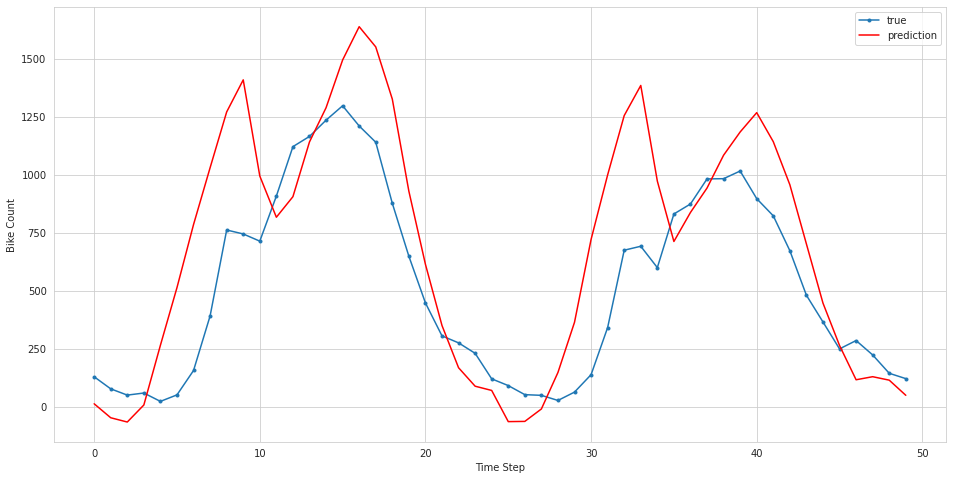

In [78]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:50], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:50], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

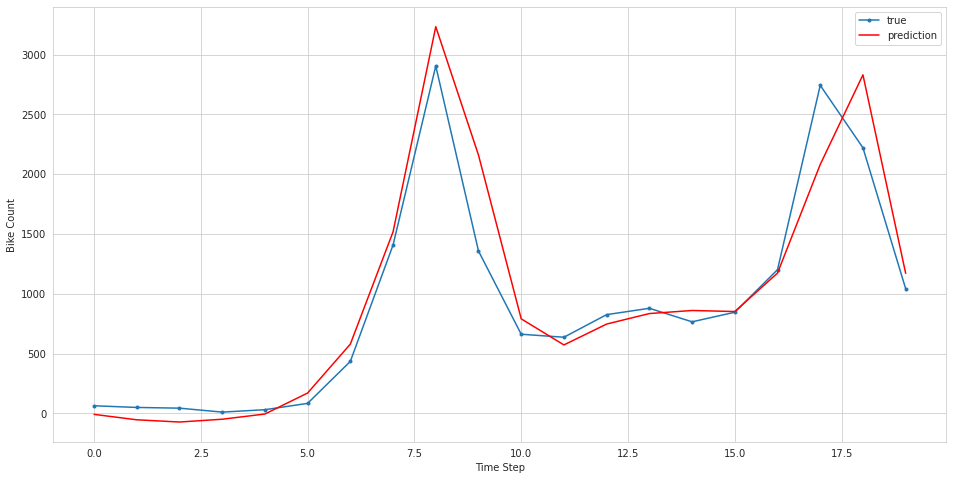

In [79]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[120:140], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[120:140], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

- Our prediction seems good because it fits to real values.
- We want to see extreme points so we made zoom timestamp 120-140.

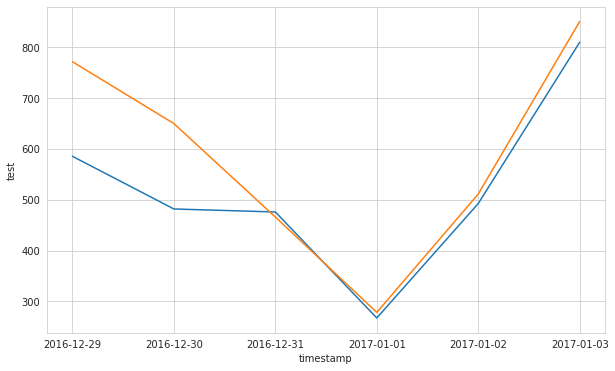

In [80]:
data_by_day = pred_test.resample('24H').mean()
sns.lineplot(x=data_by_day.index, y='test', data=data_by_day)
sns.lineplot(x=data_by_day.index, y='prediction', data=data_by_day)
plt.show()

- Above you can see grapph day by day.
- It has smallest value 2017.01.01. 
- It is new year also holiday time and one of the coldest day.
- Because of that reasons this days bikesharing has smallest value.

### Second way : after each prediction, result will be use for next prediction

In [81]:
train

,cnt,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.470,-1.188,0.949,-0.857,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,-0.501,-1.188,0.949,-0.952,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,-0.504,-1.250,1.128,-1.429,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,-0.547,-1.312,1.308,-1.429,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,-0.565,-1.312,0.949,-0.810,0.000,1.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27 19:00:00,-0.233,-1.062,0.795,-1.143,1.000,0.000,0,0,0,0,0,0
2016-12-27 20:00:00,-0.341,-1.125,0.795,-1.238,1.000,0.000,0,0,0,0,0,0
2016-12-27 21:00:00,-0.366,-1.188,0.949,-1.238,1.000,0.000,0,0,0,0,0,0


In [82]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,
2016-12-28 00:00:00,-1.438,1.308,-1.143,0.000,0.000,0,0,0,0,0,0
2016-12-28 01:00:00,-1.438,1.128,-0.857,0.000,0.000,0,0,0,0,0,0
2016-12-28 02:00:00,-1.438,0.949,-0.857,0.000,0.000,0,0,0,1,0,0
2016-12-28 03:00:00,-1.438,1.308,-0.810,0.000,0.000,0,0,0,0,1,0
2016-12-28 04:00:00,-1.438,1.128,-0.810,0.000,0.000,0,0,0,0,1,0
2016-12-28 05:00:00,-1.438,1.128,-0.571,0.000,0.000,0,0,0,0,1,0
2016-12-28 06:00:00,-1.375,1.128,-0.667,0.000,0.000,0,0,0,0,0,1
2016-12-28 07:00:00,-1.500,1.308,-0.857,0.000,0.000,0,0,0,0,0,1
2016-12-28 08:00:00,-1.562,1.308,-0.857,0.000,0.000,0,0,0,0,1,0


- In first way, we made each prediction according to real values.
- Second way, we made each prediction from predicted values.
- For this reason we created df_fake dataframe to fill by predicted values.

- As you see our data inversed. So our fist data is last data ,last data is first data.

In [83]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([-0.52916374, -0.54532677, -0.57765285, -0.57905833, -0.57554462,
       -0.54673226, -0.49262122, -0.34223472, -0.07238229, -0.11454673,
       -0.08222066, -0.02600141,  0.09135629,  0.05200281,  0.06957133,
        0.08573436,  0.1588194 ,  0.16163036,  0.        , -0.20168658,
       -0.30709768, -0.37596627, -0.40899508, -0.46099789])

- 

In [84]:
df_fake.shape

(24, 11)

- We have to make reshape becacuse model needs this shape for working.

In [85]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 11)

In [86]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

- Our train data is scaled and educated.
- We had prediction values here. We predicted new values from predicted values.

In [87]:
predictions_scaled

[array([-0.5337405], dtype=float32),
 array([-0.5883877], dtype=float32),
 array([-0.6578846], dtype=float32),
 array([-0.72832525], dtype=float32),
 array([-0.8352541], dtype=float32),
 array([-0.95090044], dtype=float32),
 array([-0.9749805], dtype=float32),
 array([-0.6437744], dtype=float32),
 array([0.52077055], dtype=float32),
 array([2.869587], dtype=float32),
 array([1.6525025], dtype=float32),
 array([0.35871893], dtype=float32),
 array([-0.15631288], dtype=float32),
 array([-0.07193888], dtype=float32),
 array([-0.04423951], dtype=float32),
 array([-0.07540774], dtype=float32),
 array([-0.06009839], dtype=float32),
 array([0.10283486], dtype=float32),
 array([0.43464795], dtype=float32),
 array([0.79290265], dtype=float32),
 array([0.49089804], dtype=float32),
 array([0.04453145], dtype=float32),
 array([-0.22506392], dtype=float32),
 array([-0.38712814], dtype=float32)]

In [88]:
reel

array([[-0.52916374],
       [-0.54532677],
       [-0.57765285],
       [-0.57905833],
       [-0.57554462],
       [-0.54673226],
       [-0.49262122],
       [-0.34223472],
       [-0.07238229],
       [-0.11454673],
       [-0.08222066],
       [-0.02600141],
       [ 0.09135629],
       [ 0.05200281],
       [ 0.06957133],
       [ 0.08573436],
       [ 0.1588194 ],
       [ 0.16163036],
       [ 0.        ],
       [-0.20168658],
       [-0.30709768],
       [-0.37596627],
       [-0.40899508],
       [-0.46099789]])

In [89]:
eval_metrics(reel, predictions_scaled)

r2_score: -8.060657840524275 
 mae: 0.46881048470992104 
 mse: 0.6332158967090761 
 rmse: 0.7957486391499995


- Rarerly erors are so big. So R square could be minus.

### Inverse Transformation and Compare

In [90]:
predictions = cnt_transformer.inverse_transform(predictions_scaled)
reel = cnt_transformer.inverse_transform(reel)

In [91]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-12-28 00:00:00,98.000,91.487
2016-12-28 01:00:00,75.000,13.724
2016-12-28 02:00:00,29.000,-85.170
2016-12-28 03:00:00,27.000,-185.407
2016-12-28 04:00:00,32.000,-337.567
2016-12-28 05:00:00,73.000,-502.131
2016-12-28 06:00:00,150.000,-536.397
2016-12-28 07:00:00,364.000,-65.091
2016-12-28 08:00:00,748.000,1592.056


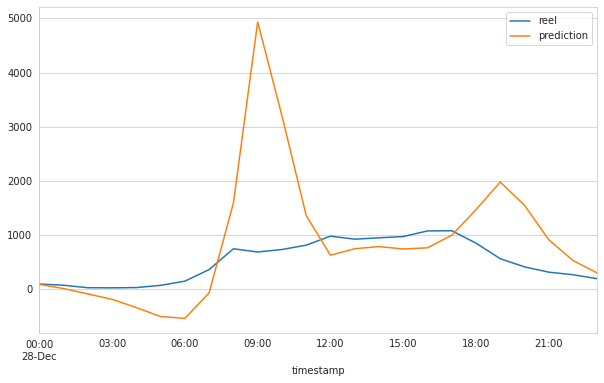

In [92]:
compare.plot()

- When comparing predcition values to reel values they are  lost of difference.
- It needs improving.

## 5. Retrain and Forecasting

### Scale full data

In [93]:
val_size = 24
val = df_dum.iloc[-val_size:]
full = df_dum.iloc[:-val_size]
print(len(full), len(val))

17390 24


- After the big differences of prediction we need to retrain data and forecasting
- We used validation data here.
- Firsly train and then scale it.
- Last 24 data keep for test
- Others will need to be fitting.


In [94]:
f_columns = df_dum.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns])
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

In [95]:
full

,cnt,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.468,-1.188,0.925,-0.857,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2015-01-04 01:00:00,-0.499,-1.188,0.925,-0.952,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-04 02:00:00,-0.501,-1.250,1.100,-1.429,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-04 03:00:00,-0.545,-1.312,1.275,-1.429,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-04 04:00:00,-0.563,-1.312,0.925,-0.810,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-02 19:00:00,-0.290,-1.188,0.325,-0.381,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 20:00:00,-0.360,-1.188,0.025,-0.190,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 21:00:00,-0.431,-1.250,0.175,-0.381,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### reshape to [samples, time_steps, n_features]

In [96]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


### Create Final model with full data 

In [97]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [98]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
724/724 [==============================] - 7s 5ms/step - loss: 0.1039
Epoch 2/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0326
Epoch 3/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0239
Epoch 4/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0204
Epoch 5/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0180
Epoch 6/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0164
Epoch 7/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0156
Epoch 8/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0147
Epoch 9/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0142
Epoch 10/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0135
Epoch 11/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0131
Epoch 12/15
724/724 [==============================] - 4s 5ms/step - loss: 0.0123
Epoch 13/15
724/724 [====

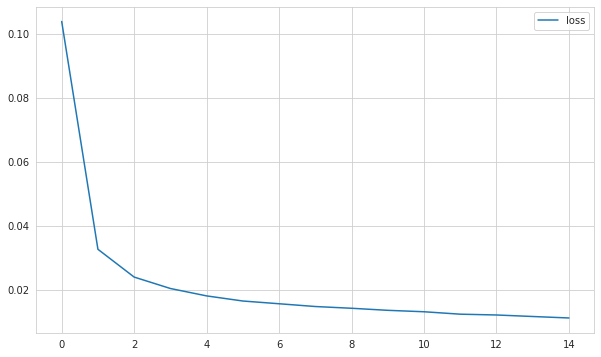

In [99]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [100]:
df_fake = val.iloc[:,1:]
df_fake

,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,
2017-01-03 00:00:00,-1.438,0.775,-0.381,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 01:00:00,-1.438,0.625,-0.476,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 02:00:00,-1.500,0.775,-0.381,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 03:00:00,-1.562,0.925,-0.190,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 04:00:00,-1.562,0.925,-0.095,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 05:00:00,-1.500,0.775,-0.095,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2017-01-03 06:00:00,-1.438,0.625,0.286,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 07:00:00,-1.438,0.625,0.381,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-03 08:00:00,-1.438,0.625,0.333,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


In [101]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

### First way : after each prediction, reel value will be use for next prediction

In [102]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [103]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9797564606348566 
 mae: 0.05277407793117697 
 mse: 0.0066306716632676494 
 rmse: 0.0814289362773925


In [104]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 6.7570618e+01,  2.3272705e+00,  1.4739075e+01,  1.6207275e+01,
        -1.3803284e+01,  1.4579144e+02,  4.8193695e+02,  1.4701992e+03,
         2.8451226e+03,  1.4376118e+03,  6.7569690e+02,  6.2147650e+02,
         7.8051465e+02,  8.1579407e+02,  8.6810101e+02,  8.1288940e+02,
         1.0534572e+03,  2.2912051e+03,  2.3843989e+03,  1.1432094e+03,
         6.1060303e+02,  3.5581140e+02,  1.7563574e+02,  6.0305420e+01]],
      dtype=float32)

In [149]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [127]:
full.tail()

,cnt,T_real,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2017-01-02 19:00:00,-0.290,-1.188,0.325,-0.381,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 20:00:00,-0.360,-1.188,0.025,-0.190,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 21:00:00,-0.431,-1.250,0.175,-0.381,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 22:00:00,-0.454,-1.312,0.325,-0.476,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-01-02 23:00:00,-0.494,-1.438,0.925,-0.476,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [150]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

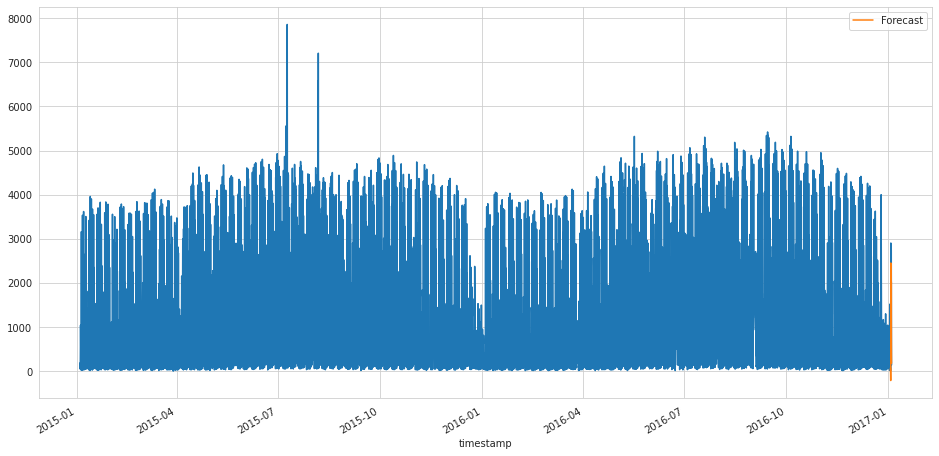

In [151]:
ax = df_dum["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(736332.0, 736332.9583333334)

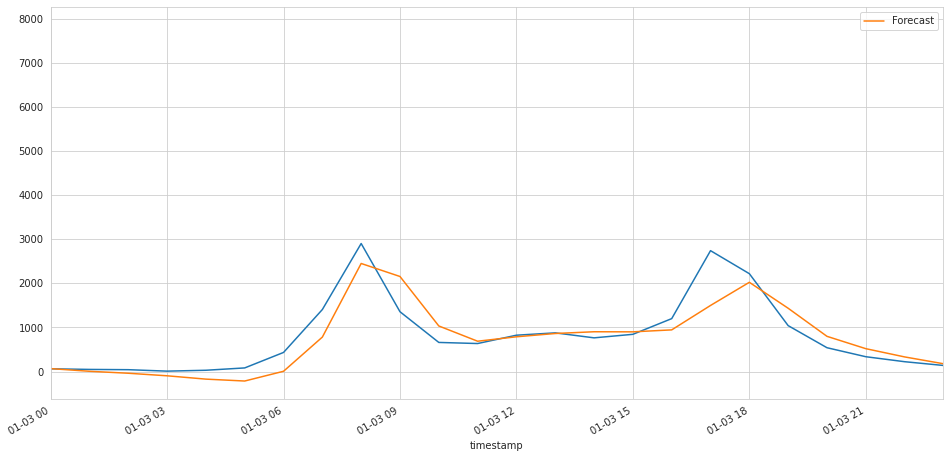

In [153]:
ax = df_dum["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-03 00:00:00', '2017-01-03 23:00:00')

### Second way : after each prediction, result will be use for next prediction

In [138]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [139]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.768668262886419 
 mae: 0.18775993071824468 
 mse: 0.0757715716815134 
 rmse: 0.27526636496585155


In [140]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  67.57062  ,    6.6745605,  -37.592102 ,  -95.495056 ,
        -170.97485  , -214.0968   ,    6.88678  ,  782.3297   ,
        2451.1343   , 2156.1758   , 1034.3131   ,  688.509    ,
         789.1548   ,  863.5254   ,  903.1788   ,  901.03503  ,
         945.56586  , 1499.4568   , 2024.4355   , 1435.9349   ,
         799.2698   ,  519.4706   ,  332.5525   ,  177.82837  ]],
      dtype=float32)

In [154]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [155]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

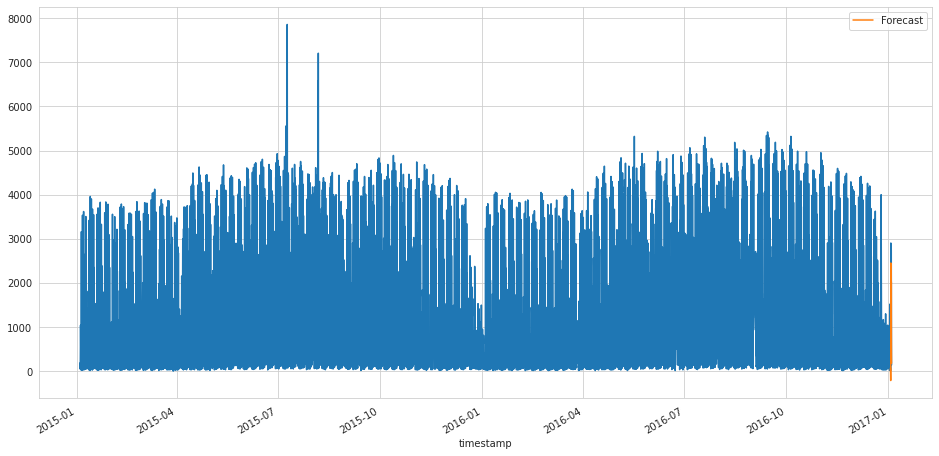

In [156]:
ax = df_dum["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(736332.0, 736332.9583333334)

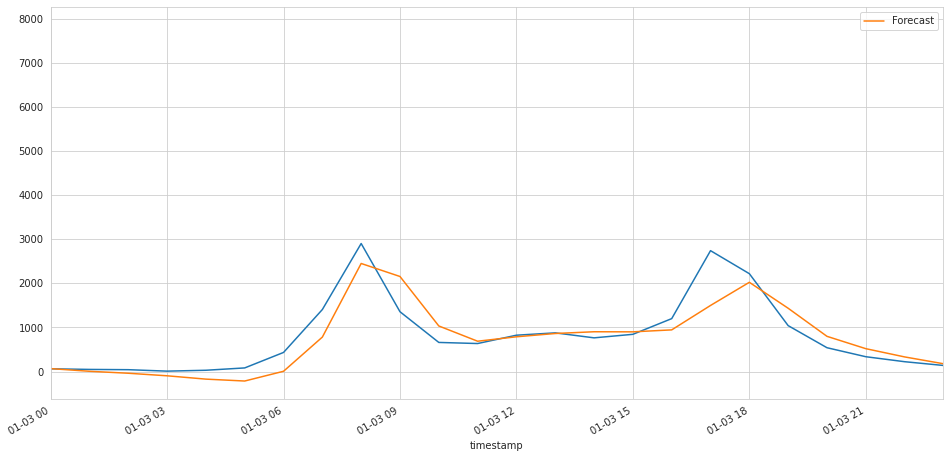

In [157]:
ax = df_dum["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-03 00:00:00', '2017-01-03 23:00:00')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___